In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import sys

In [3]:
sys.path.append('../')
from visualization_utils import *

In [4]:
RL_bounds = np.load('../../../data/volume/topdown_RL_bounds.npy')
AL_bounds = np.load('../../../data/volume/topdown_AL_bounds.npy')

In [5]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_cluster.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')
df = pd.merge(
    df_neuron,
    df_morphos[['segment_id', 'split_index', 'soma_x', 'soma_z']],
    on=['segment_id', 'split_index'],
)

In [6]:
df = pd.concat([df[df['cluster_L4'] == 15], df[df['cluster_L5'] == 1]])

In [7]:
len(df)

710

In [8]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2

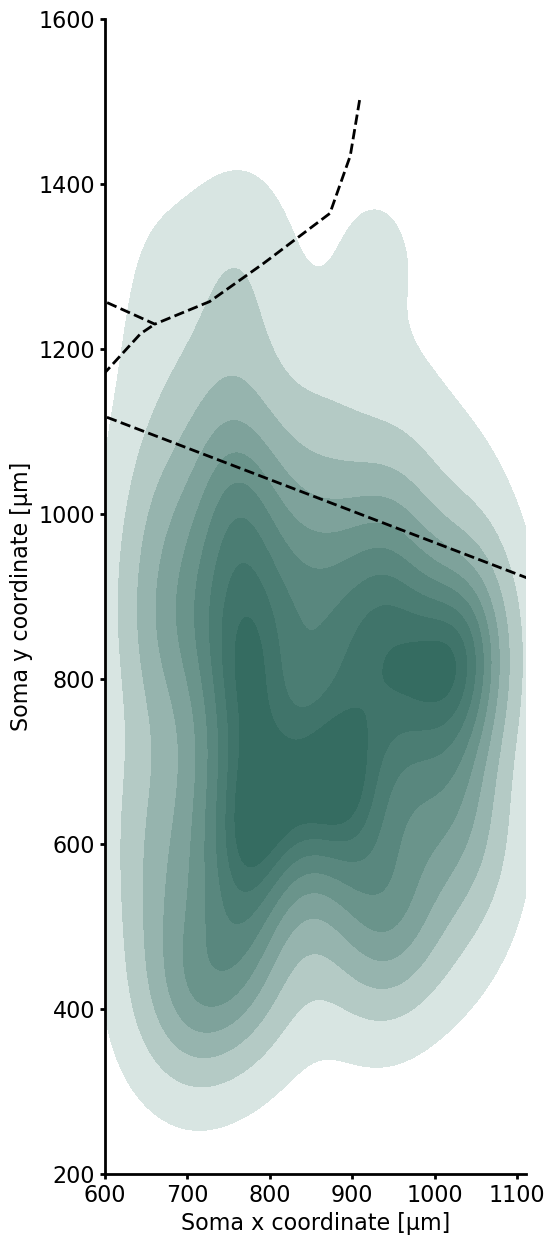

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True, sharey=True)
sns.kdeplot(
    data=df,
    x='soma_z',
    y='soma_x',
    ax=ax,
    legend=False,
    fill=True,
    cmap=sns.light_palette(cm.batlow.colors[75], as_cmap=True),
)

ax.plot(
    RL_bounds[:, 1],
    RL_bounds[:, 0],
    '--',
    label='RL_bounds',
    color='black',
    linewidth=2,
)
ax.plot(
    AL_bounds[:, 1],
    AL_bounds[:, 0],
    '--',
    label='AL_bounds',
    color='black',
    linewidth=2,
)
ax.set_aspect('equal')

ax.set_xlabel('Soma x coordinate [μm]', fontsize=16)
ax.set_ylabel('Soma y coordinate [μm]', fontsize=16)
ax.set_xlim([600, 1110])
ax.set_ylim([200, 1600])
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
sns.despine()

# plt.savefig('figures/fig7B_dist_basal_bias.pdf', bbox_inches='tight', transparent=True)